In [20]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import os

PATH = 'train'
IMG_SIZE = 50

classes = {'cat': 0, 'dog': 1}

def prepareData():
    path = PATH
    training_data = []
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            class_num = classes[img.split('.')[0]]
            training_data.append([img_array, class_num])
        except Exception as e:
            print(str(e))
    return training_data

training_data = prepareData()
print(len(training_data))

25000


In [21]:
'''import pickle
file = open('train.pickle', 'wb')
pickle.dump(training_data, file)
file.close()'''

In [33]:
X = []
y = []

for (features, labels) in training_data:
    X.append(features)
    y.append(labels)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 50s 2ms/sample - loss: 0.6222 - accuracy: 0.6536 - val_loss: 0.5581 - val_accuracy: 0.7240
Epoch 2/10
22500/22500 [==============================] - 51s 2ms/sample - loss: 0.5331 - accuracy: 0.7355 - val_loss: 0.5495 - val_accuracy: 0.7248
Epoch 3/10
22500/22500 [==============================] - 52s 2ms/sample - loss: 0.4885 - accuracy: 0.7706 - val_loss: 0.4969 - val_accuracy: 0.7596
Epoch 4/10
22500/22500 [==============================] - 53s 2ms/sample - loss: 0.4641 - accuracy: 0.7809 - val_loss: 0.4774 - val_accuracy: 0.7724
Epoch 5/10
22500/22500 [==============================] - 60s 3ms/sample - loss: 0.4384 - accuracy: 0.7960 - val_loss: 0.4458 - val_accuracy: 0.8020
Epoch 6/10
22500/22500 [==============================] - 61s 3ms/sample - loss: 0.4117 - accuracy: 0.8126 - val_loss: 0.4369 - val_accuracy: 0.8112
Epoch 7/10
22500/22500 [==============================] -

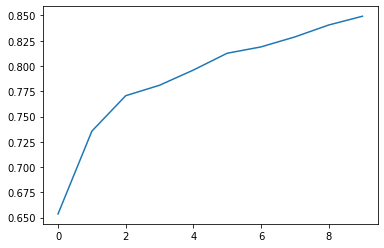

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

X_train = X / 255.0
model = Sequential()
model.add( Conv2D(64, (3, 3), input_shape = X_train.shape[1:]) )
model.add( Activation("relu") )
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add( Conv2D(64, (3, 3)) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])
history = model.fit(X_train, np.array(y), batch_size=32, epochs=10, validation_split=0.1)
acc = history.history['accuracy']
plt.plot([x for x in range(len(acc))], acc)

file = open('model.pickle', 'wb')
pickle.dump(model, file)
file.close()